# Churn Analysis

## Introduction

Customer retention is a critical factor for sustained growth and profitability. Customer churn, or the loss of customers over a specified period, presents a significant challenge for companies across various industries. Understanding the factors driving churn and implementing effective retention strategies are essential for businesses to maintain a loyal customer base and achieve long-term success. This presentation dives in to identify churn customers over the period of 3 and 9 months.

## Defnition of churn

Churn refers to the rate at which customers discontinue their relationship with a company or stop using its products or services within a given period. It is a key metric used to measure customer attrition and retention, providing insights into the health and stability of a business. Based on our service and metrics, a business is said to have churned if It has not made any successful API call in the period of time been analyzed.

- Nine (9) Months Churn - This refers to customers that has stopped using the company services over a period of nine months

- Three (3) Months Churn - This refers to customers that has stopped using the company services over a period of three months

## Objectives

- Work on period of 9 and 3 months for customer churn
- Identify key factors contributing to customer churn.
- Identify customers that have churned

## Nine (9) Months Churn Analysis

A total of 628 clients have been generally active in the past 9 months

### Description of the Customers

In [637]:
nine_months_df = nine_months_df.fillna(0)
nine_months_df["total_call"] = nine_months_df["success"] + nine_months_df["server_error"]
nine_months_df_stats = nine_months_df[["total_call", "success"]].describe().transpose()
nine_months_df_stats = nine_months_df_stats.drop(["count", "std"], axis=1)
nine_months_df_stats

,mean,min,25%,50%,75%,max
total_call,11298.060510,0.0,10.0,68.0,463.75,2891391.0
success,10060.691083,0.0,7.0,49.0,388.25,2584721.0


These statistics provide a summary of the distribution of total and success calls, to understand the overall performance of the customers.

- Mean: The mean value (6084) is indicating the typical/average performance of a customer.

- Minimum (min): The minimum total and success calls done by any customer is 0 and 0 respectively. This represents the lowest success call made.

- 25th Percentile (25%): Also known as the first quartile, this value indicates the total and success calls below which falls below 25%. that is, 25% of the customers made 9 or below total calls with 7 or below as success calls

- Median (50%): Infers the median, represents the middle value. the median total and success call is 48 and 49, indicating that half of the customers made below 48 total calls with success calls of 49.

- 75th Percentile (75%): Also known as the third quartile, this indicates 75% of the customers made 358 total calls with success calls of 388 calls or below.

- Maximum (max): This represents the highest performance or activity by a customer

#### We have 65 number of customers that have not made a successfull API CALL over nine months (since when the data started). 

#### Now taking a deeper dive into these customers we found out that:

In [133]:
check_merchant_df = merchant_df.copy()
check_merchant_df = pd.merge(nine_months_df, check_merchant_df, on=["org_id", "business_name"], how="inner")
check_merchant_df["date_created"] = pd.to_datetime(check_merchant_df["date_created"])
check_merchant_df['date_created'] = check_merchant_df['date_created'].dt.strftime('%Y-%m')
check_merchant_df["date_created"] = pd.to_datetime(check_merchant_df["date_created"])

## Churn (9) Months

In [189]:
potential_churns_9_months = check_merchant_df.copy()

def detect_churner(data):

    if data['success'] > 0:
        return "active"
    else:
        return "churn"
    
potential_churns_9_months["Churn"] = potential_churns_9_months.apply(detect_churner, axis=1)

In [633]:
potential_churns_9_months[potential_churns_9_months["business_name"]=="Ogamoni"]

,org_id,business_name,total_calls,num_of_calls,success,revenue,server_error,no_record,country,currency,extra,verified_sector,platform,date_created,lead_source,verification_status,business_document,email,phone,Churn


In [309]:
peleza = potential_churns_9_months[potential_churns_9_months["platform"] == "PELEZA"]
prembly = potential_churns_9_months[potential_churns_9_months["platform"] == "PREMBLY"]

Prembly Merchants: 
active    545
churn      63
Name: Churn, dtype: int64
Peleza Merchants: 
active    7
churn     2
Name: Churn, dtype: int64


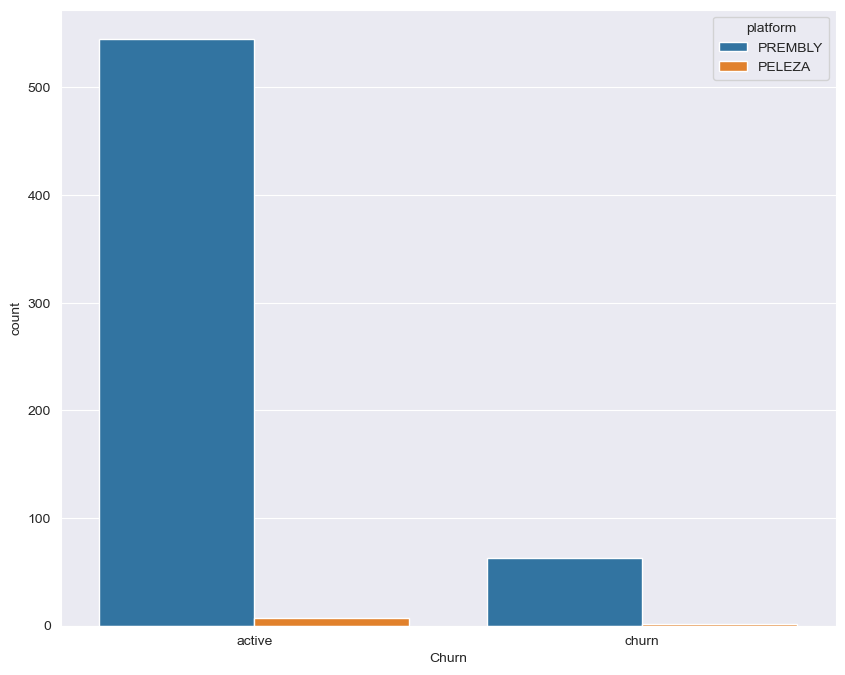

In [315]:
print("Prembly Merchants: ")
print(prembly.Churn.value_counts())
print("Peleza Merchants: ")
print(peleza.Churn.value_counts())
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_9_months, x="Churn", hue="platform");

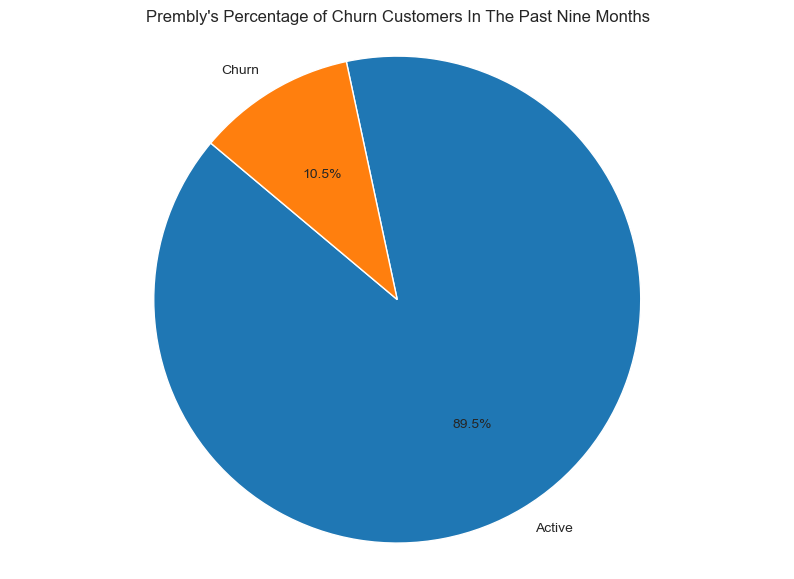

In [316]:
plt.figure(figsize=(10, 7))
plt.pie(prembly.Churn.value_counts(), labels=["Active", "Churn"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Prembly's Percentage of Churn Customers In The Past Nine Months")
plt.show();

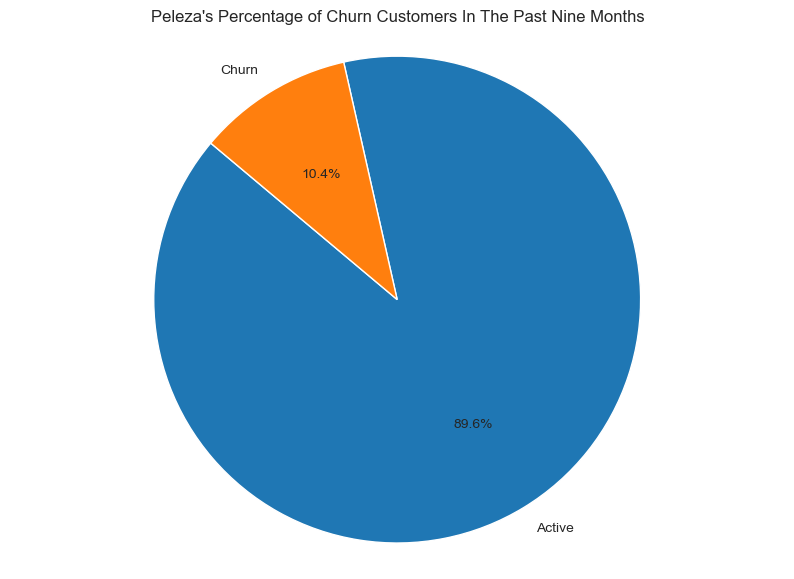

In [317]:
plt.figure(figsize=(10, 7))
plt.pie(prembly.Churn.value_counts(), labels=["Active", "Churn"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Peleza's Percentage of Churn Customers In The Past Nine Months")
plt.show();

The distribution revealed that out of a total of 628 clients, 65 customers have churned. Among these churned customers, 63 belonged to the Prembly platform, while the remaining 2 were from the Peleza platform. This translates to a churn rate of approximately 10.50% for Prembly and 10.40% for Peleza, indicating a similar churn rate across both platforms. Despite slight variations, both platforms experienced a notable proportion of customers discontinuing their services over nine months.

Please see here for file attached to access the chunred customers:

https://prembly-my.sharepoint.com/:x:/p/adnan/Ef5M34s95d9Erh0-fuuAfYAB-g3wSVdGfXpdRXMEdYSjcg?e=CfipR3

In [326]:
churners = potential_churns_9_months[potential_churns_9_months["Churn"] == "churn"]
peleza_churners = peleza[peleza["Churn"] == "churn"]
prembly_churners = prembly[prembly["Churn"] == "churn"]

### When Did They Sign Up?

Prembly: 
2023-06-01    30
2023-04-01    12
2023-07-01     5
2024-01-01     4
2023-05-01     3
2023-10-01     2
2023-11-01     2
2023-12-01     2
2023-09-01     2
2023-08-01     1
Name: date_created, dtype: int64
Peleza: 
2023-11-01    1
2024-01-01    1
Name: date_created, dtype: int64


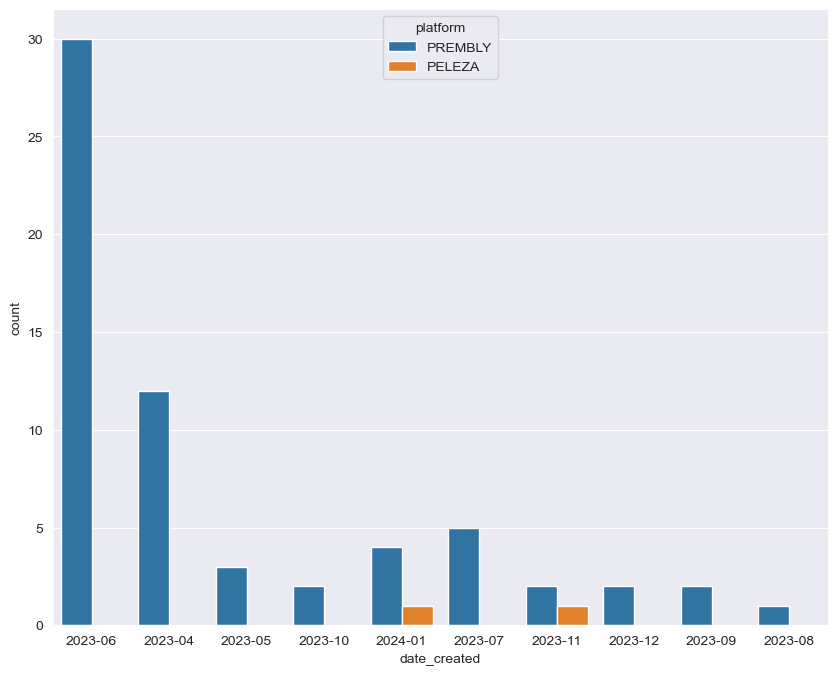

In [327]:
print("Prembly: ")
print(prembly_churners.date_created.value_counts())
print("Peleza: ")
print(peleza_churners.date_created.value_counts())
churners['date_created'] = pd.to_datetime(churners['date_created'])
churners['date_created'] = churners['date_created'].dt.strftime('%Y-%m')
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners, x="date_created", hue="platform");

The chart above illustrates that out of the total 65 churned customers, the majority were associated with the Premlby platform. Specifically, in June 2023, a significant proportion of churned customers (30) were observed to have signed up, indicating a notable concentration of churn within a single month. Additionally, April 2023, saw 12 signups, followed by smaller numbers on subsequent dates throughout the 9-month period. For the Peleza platform, churned customers were fewer, with only two observed signup in November 2023, and January 2024.

#### Recommendation:

We might want to consider offering targeted incentives or promotions to encourage engagement and loyalty among customers who signed up during these months.

### Which Country Did They Sign Up from?

Prembly: 
NG    54
GH     2
US     2
KE     2
CM     1
GB     1
ZA     1
Name: country, dtype: int64
Peleza: 
KE    2
Name: country, dtype: int64


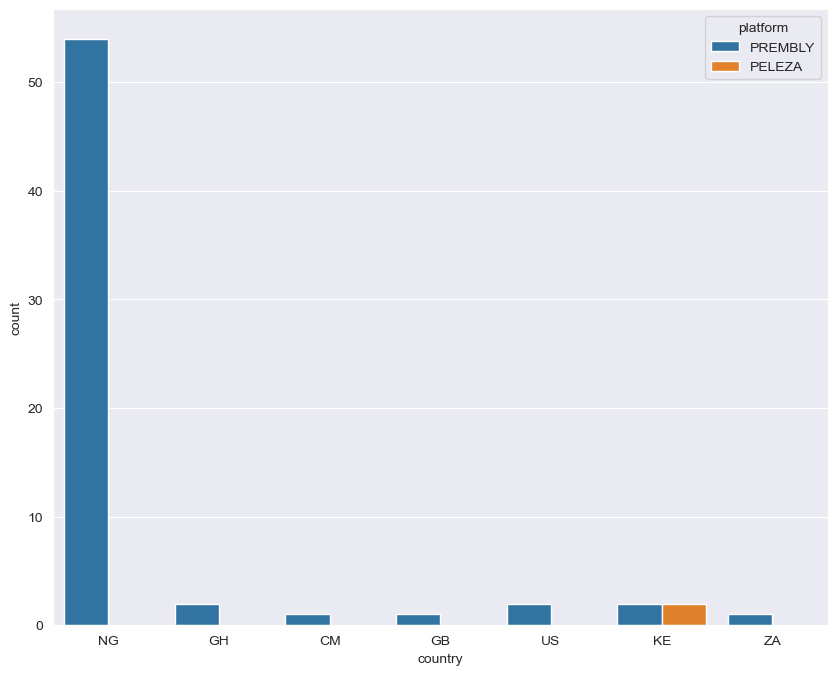

In [329]:
print("Prembly: ")
print(prembly_churners.country.value_counts())
print("Peleza: ")
print(peleza_churners.country.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners, x="country", hue="platform");

The analysis churned customers across based on country reveals distinct patterns. For the Prembly platform, the majority of churned customers, a total 54, signed up from Nigeria (NG), indicating a significant presence of churned customers from this country, though, there were smaller numbers of signups from other countries, each contributing to the churned customer base with one or two signups. In contrast, churned customers on the Peleza platform were primarily from Kenya (KE), with two signups observed. 

However, it is important to note that this figure represent only 9.3% of the total Nigerians in the dataset being considered as represented by the chart below.

#### Recommendation:

We should try to tailor marketing and customer support efforts to address specific needs or challenges faced by customers in these geographical regions.

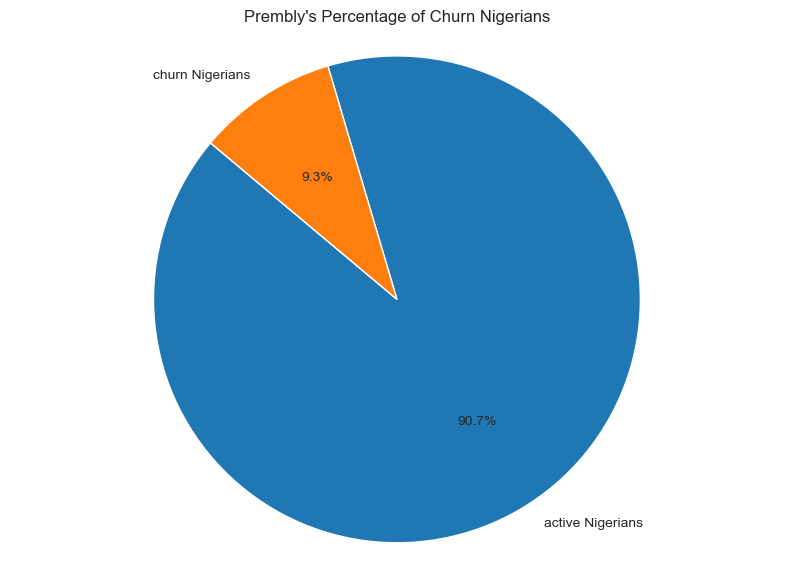

In [330]:
plt.figure(figsize=(10, 7))
ch = prembly[["country", "Churn"]]

def ch_check(data):
    if data["country"] == "NG" and data["Churn"] == "churn":
        return "churn nigerians"
    elif data["country"] == "NG" and data["Churn"] == "active":
        return "active nigerians"
    else:
        pass

ch["percentage"] = ch.apply(ch_check, axis=1)
plt.pie(ch.percentage.value_counts(), labels=["active Nigerians", "churn Nigerians"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Prembly's Percentage of Churn Nigerians")
plt.show();

### How Did They Sign Up?

Prembly: 
no-referral    51
Name: lead_source, dtype: int64
Peleza: 
Referral         1
Friend/Family    1
Name: lead_source, dtype: int64


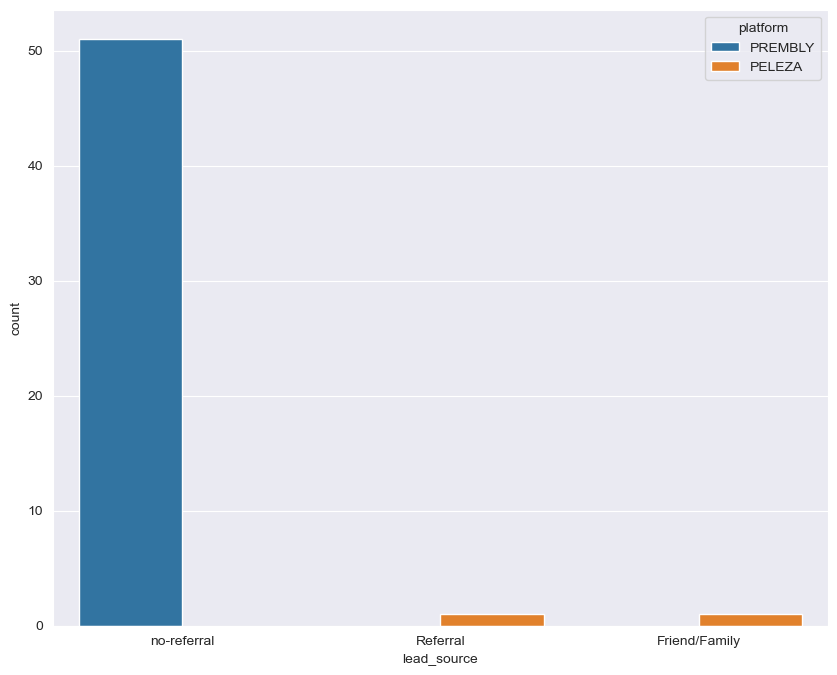

In [332]:
print("Prembly: ")
print(prembly_churners.lead_source.value_counts())
print("Peleza: ")
print(peleza_churners.lead_source.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners, x="lead_source", hue="platform");

The analysis of the lead source shows that thirteen (13) of the churned customers were not accounted for in this feature. However, the chart above demonstrates that nearly all churned customers do not have a referral and also they all belong to the Prembly platform while only two referred customers are from the Peleza platform. 

#### Recommendation:

We should try to enhance the referral program on the Prembly platform to increase customer engagement and retention. Encourage existing customers to refer new users by offering incentives or rewards for successful referrals.

### Are They From Verified Sector?

prembly: 
no sector identified                               45
others                                              9
Financial Institution                               5
IT                                                  2
Professional Services (e.g., legal, consulting)     2
Name: verified_sector, dtype: int64
peleza: 
Financial Institution    2
Name: verified_sector, dtype: int64


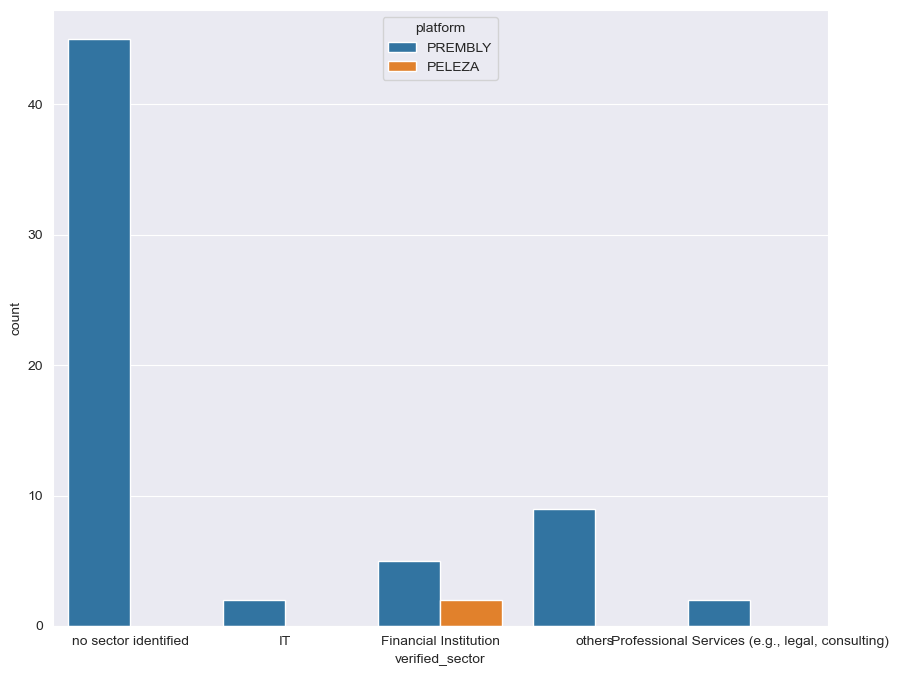

In [333]:
churners["verified_sector"] = churners["verified_sector"].map(lambda x: "others" if x == "E-commerce" or x == "Agriculture" or x == "Telecommunications" or x == "Retail Sector" or x == "Gaming and Esports" or x == "SaaS Development" or x == "None" or x == "Identity Verification and Security" or x == "Data Integration" else x)
prembly_churners["verified_sector"] = prembly_churners["verified_sector"].map(lambda x: "others" if x == "E-commerce" or x == "Agriculture" or x == "Telecommunications" or x == "Retail Sector" or x == "Gaming and Esports" or x == "SaaS Development" or x == "None" or x == "Identity Verification and Security" or x == "Data Integration" else x)
peleza_churners["verified_sector"] = peleza_churners["verified_sector"].map(lambda x: "others" if x == "E-commerce" or x == "Agriculture" or x == "Telecommunications" or x == "Retail Sector" or x == "Gaming and Esports" or x == "SaaS Development" or x == "None" or x == "Identity Verification and Security" or x == "Data Integration" else x)
print("prembly: ")
print(prembly_churners.verified_sector.value_counts())
print("peleza: ")
print(peleza_churners.verified_sector.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners, x="verified_sector", hue="platform");

The analysis of sector identification among churned customers reveals that for Prembly, a significant number of churned customers, accounting for 45 individuals, were not affiliated with any identified sector. Additionally, smaller numbers of churned customers were observed across other various sectors such as Financial Institutions, and IT. On the Peleza platform, only two churned customers were associated with the Financial Institution sector.

#### Recommendation:

Improvement in sector identification processes to ensure accurate categorization of customers. Personalize marketing messages and tailor product offerings to better meet the needs of customers in different sectors.

### Availability of Business Document (Document Upload)?

prembly: 
uploaded    61
None         2
Name: business_document, dtype: int64
peleza: 
uploaded    2
Name: business_document, dtype: int64


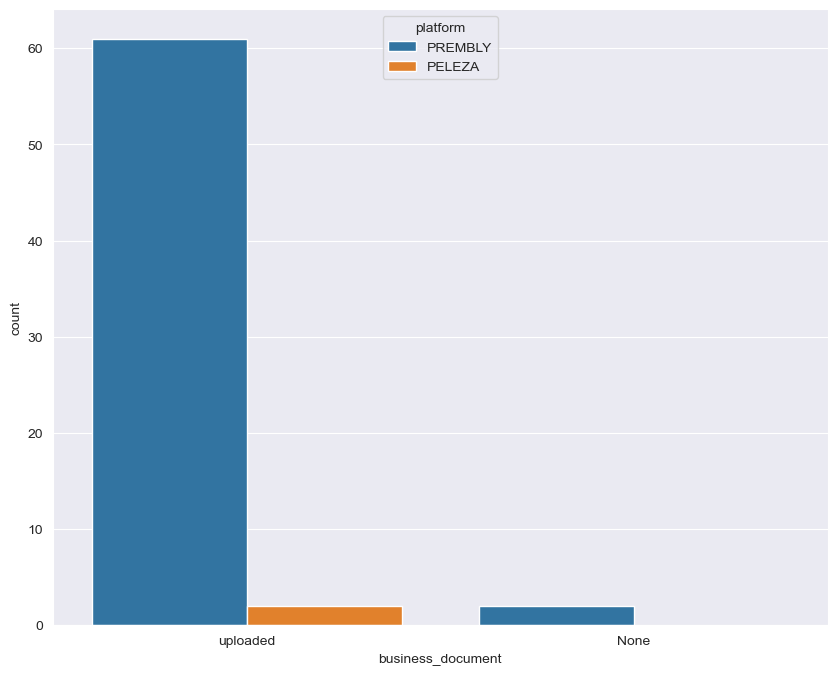

In [334]:
print("prembly: ")
print(prembly_churners.business_document.value_counts())
print("peleza: ")
print(peleza_churners.business_document.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners, x="business_document", hue="platform");

Basically almost all have uploaded their document except just two

### Server Error?

prembly: 
No     53
Yes    10
Name: server_issue, dtype: int64
peleza: 
No    2
Name: server_issue, dtype: int64


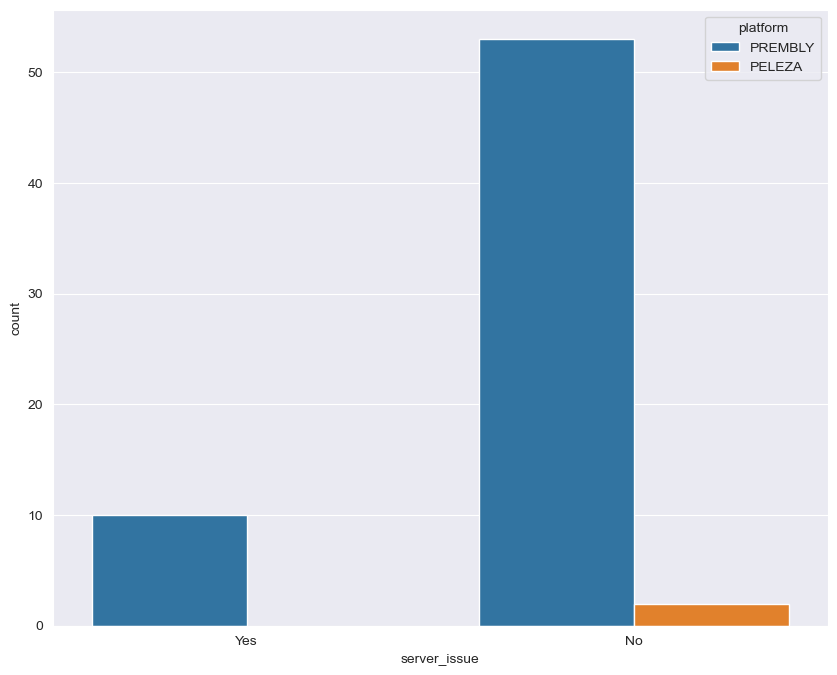

In [336]:
def check_server_error(data):
    if data["server_error"] > 0:
        return "Yes"
    else:
        return "No"
    
churners["server_issue"] = churners.apply(check_server_error, axis=1)
prembly_churners["server_issue"] = prembly_churners.apply(check_server_error, axis=1)
peleza_churners["server_issue"] = peleza_churners.apply(check_server_error, axis=1)

print("prembly: ")
print(prembly_churners.server_issue.value_counts())
print("peleza: ")
print(peleza_churners.server_issue.value_counts())

sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners, x="server_issue", hue="platform");

The chart above shows that there is a considerable number of churned customers (10) that have being making API calls, a total of (24) with Zero (0) success over the last 9 months. To furhter look into this case, the chart and data below shows these customers and their details.

#### Recommendation:

We must investigate the root causes of API errors by churned customers and implement measures to address these issues promptly and improve the reliability and performance of API services to enhance overall customer satisfaction.

In [337]:
end_point = pd.read_csv("datasets/endpoint_data.csv", names=['id', 'org_id', 'business_name', 'endpoint_called', 'total_calls', 'date_captured'])
end_point = end_point[~end_point['business_name'].str.contains("Prembly")]

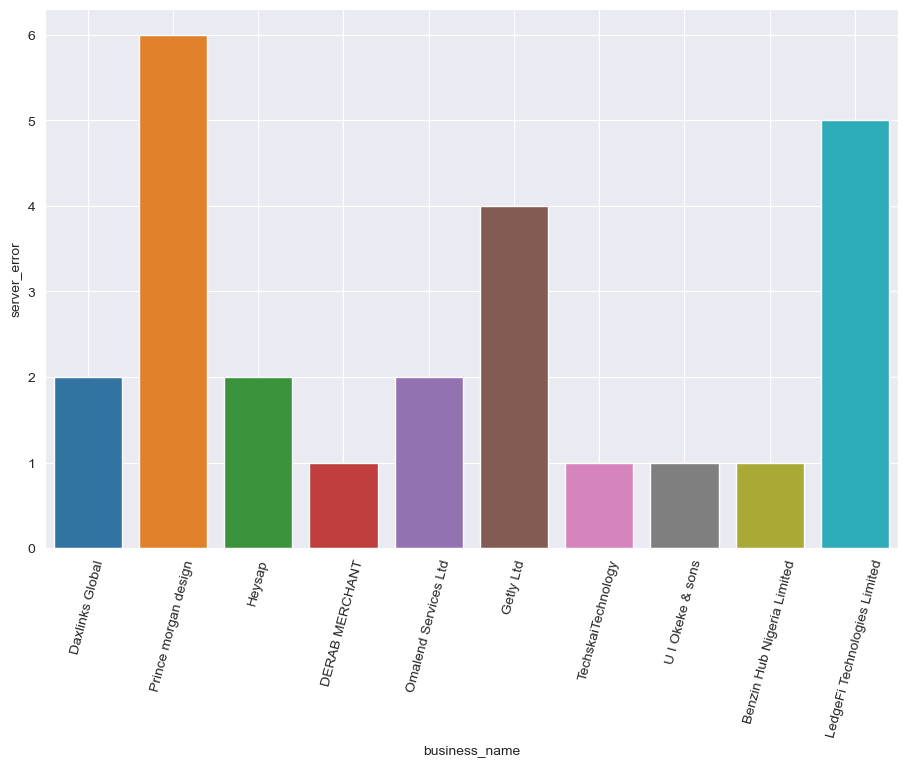

In [340]:
endpoints_ = prembly_churners[prembly_churners["server_issue"] == "Yes"]
plt.figure(figsize=(11,7))
sns.barplot(x="business_name", y="server_error", data=endpoints_)
plt.xticks(rotation=75)
plt.grid(True);

In [352]:
check_endpoint_called = pd.merge(endpoints_, end_point, on=["org_id", "business_name"], how="inner")
check_endpoint_called = check_endpoint_called[["org_id", "business_name", "date_captured", "endpoint_called"]]
check_endpoint_called = check_endpoint_called.drop_duplicates()
check_merged = pd.merge(check_endpoint_called, potential_churns_9_months, on=["org_id", "business_name"], how="inner")
check_merged = check_merged.drop_duplicates()

See here for file attached: 

https://prembly-my.sharepoint.com/:x:/p/adnan/EZsCxIIaWpBNvlW5uRzuvacBODBmPvHyyPIjJJu3KD0Vbg?e=DUg9hn

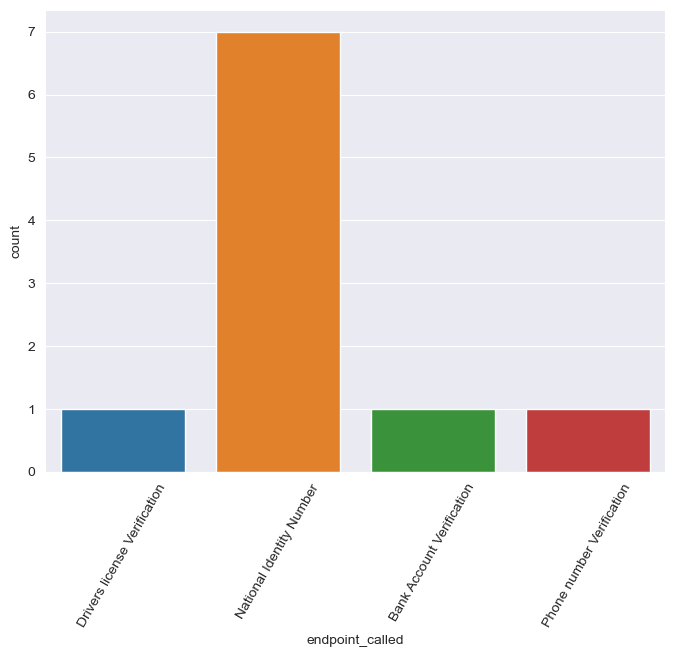

In [353]:
plt.figure(figsize=(8, 6))
sns.countplot(data=check_endpoint_called, x="endpoint_called")
plt.xticks(rotation=60);

The above chart shows that the NIN endpoint is the most called endpoint with no success from the churn customers

### Any Transaction by Churn on Wallet?

In [356]:
wallet_funding = pd.read_csv("datasets/wallet_funding.csv", names = ['org_id', 'business_name', 'amount', 'channel', 'currency', 'trans_desc', 'previous', 'reference', 'trans_state', 'trans_type', 'date_of_transaction'])
wallet_funding = wallet_funding[~wallet_funding['business_name'].str.contains("Prembly")]
wallet_df = wallet_funding.copy()
wallet_df["trans_frequency"] = wallet_df["amount"]
wallet_df = wallet_df.groupby(["org_id", "business_name"], as_index=False).agg({"amount": pd.Series.sum, "trans_frequency": pd.Series.count})

In [635]:
wallet_df[wallet_df["business_name"]=="Union Bank"]

,org_id,business_name,amount,trans_frequency


PREMBLY    8
Name: platform, dtype: int64


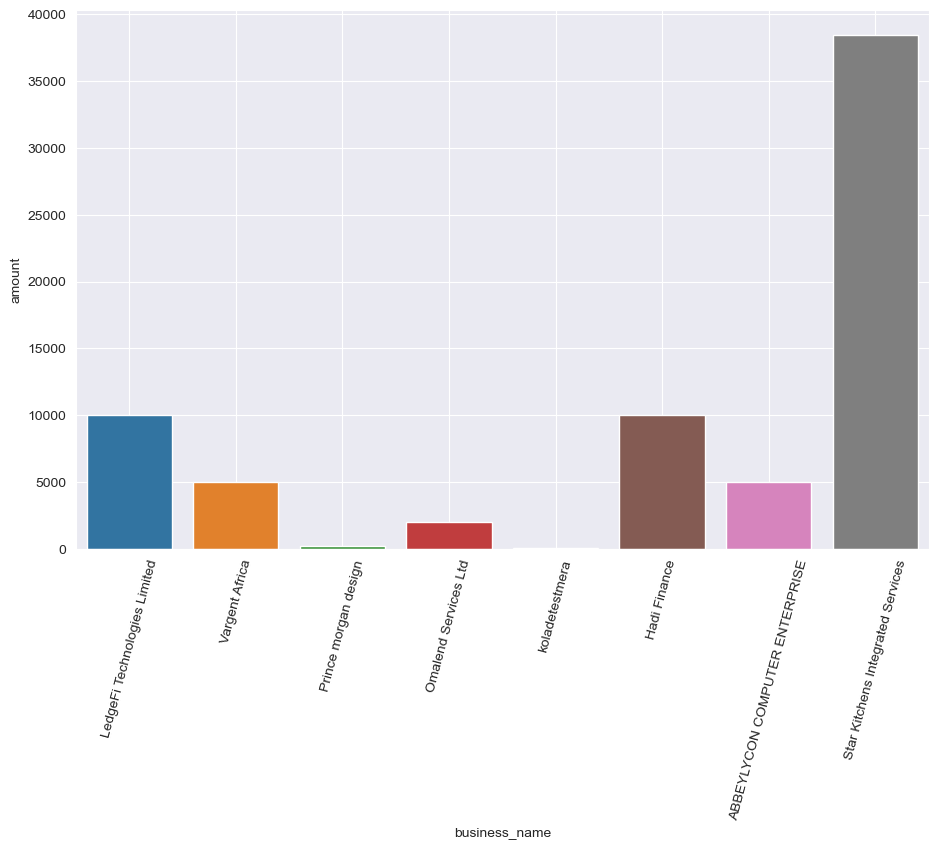

In [357]:
wallet_check = pd.merge(wallet_df, churners, on=["org_id", "business_name"], how="inner")
print(wallet_check.platform.value_counts())
plt.figure(figsize=(11,7))
sns.barplot(x="business_name", y="amount", data=wallet_check)
plt.xticks(rotation=75)
plt.grid(True);

The chart shows a that a few churn customers, a total of eight (8) out of sixty-five (65) has made transaction in their wallet in the last Nine (9) months.

#### Recommendation:

We should develop targeted marketing campaigns or product features to incentivize continued usage and foster customer loyalty since it was observed that some customers actually made top ups without having a successfull API call.

## Summary (Nine Months Churn)

1. **Total and Success Calls Distribution:**
   - The analysis reveals that the minimum total and success calls made by any customer is 0, indicating the lowest success call made.
   - At the 25th percentile, 25% of customers made 9 or fewer total calls, with 7 or fewer being successful calls.
   - The median total and success call count is 48 and 49, respectively, suggesting that half of the customers made below 48 total calls with 49 successful calls.
   - At the 75th percentile, 75% of customers made 358 total calls with successful calls of 388 or fewer.
   - Notably, 65 customers, representing 10.54% of the total customers, have discontinued or stopped using the product or service over the last 9 months, while 552 customers remain active and retained.

2. **Churn Trends:**
   - The majority of churned customers signed up in June 2023, with a significant number also signing up in April 2023.
   - Additionally, the analysis indicates that most churned customers are from Nigeria, though they represent only 9.3% of the total Nigerians in the dataset.
   - Furthermore, nearly all churned customers do not have a referral, and a significant number cannot be identified or attached to a known sector.

3. **API Calls and Transactions:**
   - A key finding is that 10 churned customers made API calls, with a total of 24 calls and zero success over the last 9 months.
   - Among these API calls, the NIN endpoint is the most called with a no success from churned customers.
   - Additionally, eight churned customers have made transactions (funding) in their wallet in the last 9 months.
 
Based on the findings from the 9-month churn analysis, it's crucial to understand platform-specific churn rates, particularly the higher attrition observed on the Prembly platform compared to Peleza. Tailored strategies should be devised to bolster customer loyalty on Prembly. Also, analyzing sign-up dates reveals spikes in churn among customers who joined in June and April, suggesting a need for targeted engagement initiatives or promotional offers to incentivize continued usage. Furthermore, geographical variations in churn rates highlight the importance of localized customer support and marketing efforts. Improving sector identification processes enables personalized targeting and customization, to enable stronger connections with customers across diverse industries. Streamlining document upload procedures and addressing API errors will enhance user experience and reliability, thus reducing customer frustration and potential churn.

# Three (3) Months Churn Analysis

A total of 507 clients have been generally active in the past 3 months

## Description of Customers

In [638]:
three_months_df = three_months_df.fillna(0)
three_months_df["total_call"] = three_months_df["success"] + three_months_df["server_error"]
three_months_df_stats = three_months_df[["total_call", "success"]].describe().transpose()
three_months_df_stats = three_months_df_stats.drop(["count", "std"], axis=1)
three_months_df_stats

,mean,min,25%,50%,75%,max
total_call,9893.790927,0.0,9.0,58.0,301.0,2599769.0
success,8792.956607,0.0,6.0,43.0,278.0,2307761.0


These statistics provide a summary of the distribution of total and success calls, to understand the overall performance of the customers.

- **Mean**: The mean value (2256) is indicating the typical/average performance of a customer.

- **Minimum (min)**: The minimum total and success calls done by any customer is 0 and 0 respectively. This represents the lowest success call made.

- **25th Percentile (25%)**: Also known as the first quartile, this value indicates the total and success calls below which falls below 25%. that is, 25% of the customers made 6 or below total and success calls

- **Median (50%)**: Infers the median, represents the middle value. the median total and success call is 29 and 43, indicating that half of the customers made below 29 total calls and success calls of 43.

- **75th Percentile (75%)**: Also known as the third quartile, this indicates 75% of the customers made 153 total calls with success calls of 278 calls or below.

- **Maximum (max)**: This represents the highest performance or activity by a customer.

#### We have 45 number of customers that have not made a successfull API CALL over the last Three Months. 

#### Now taking a deeper dive into these customers we found out that:

In [234]:
check_merchant_df_3 = merchant_df.copy()
check_merchant_df_3 = pd.merge(three_months_df, check_merchant_df_3, on=["org_id", "business_name"], how="inner")
check_merchant_df_3["date_created"] = pd.to_datetime(check_merchant_df_3["date_created"])
check_merchant_df_3['date_created'] = check_merchant_df['date_created'].dt.strftime('%Y-%m')
check_merchant_df_3["date_created"] = pd.to_datetime(check_merchant_df_3["date_created"])

## Churn (3 Months)

In [235]:
potential_churns_3_months = check_merchant_df_3.copy()
potential_churns_3_months["Churn"] = potential_churns_3_months.apply(detect_churner, axis=1)

In [360]:
peleza_3 = potential_churns_3_months[potential_churns_3_months["platform"] == "PELEZA"]
prembly_3 = potential_churns_3_months[potential_churns_3_months["platform"] == "PREMBLY"]

Prembly Merchants: 
active    446
churn      43
Name: Churn, dtype: int64
Peleza Merchants: 
active    7
churn     2
Name: Churn, dtype: int64


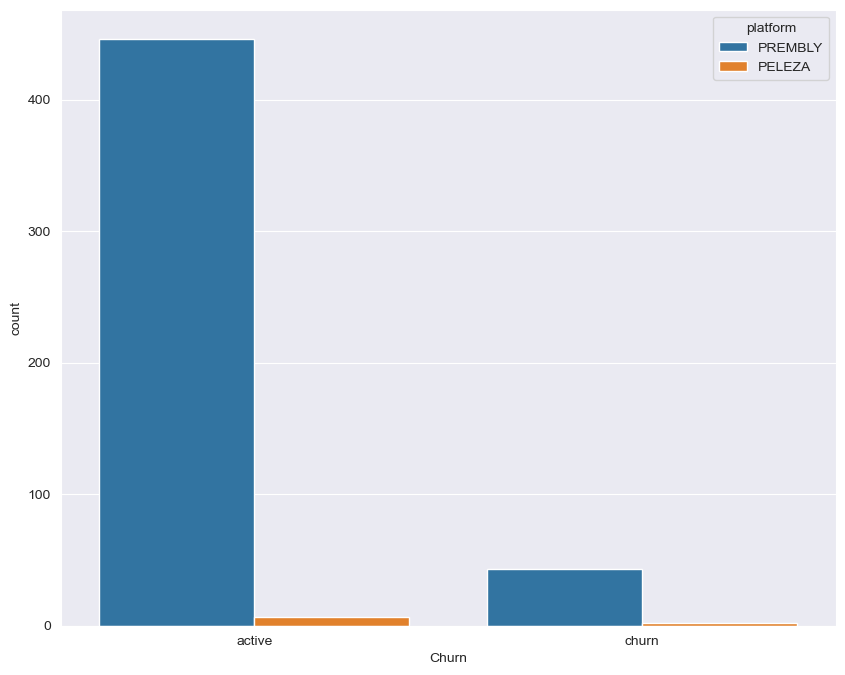

In [361]:
print("Prembly Merchants: ")
print(prembly_3.Churn.value_counts())
print("Peleza Merchants: ")
print(peleza_3.Churn.value_counts())
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_3_months, x="Churn", hue="platform");

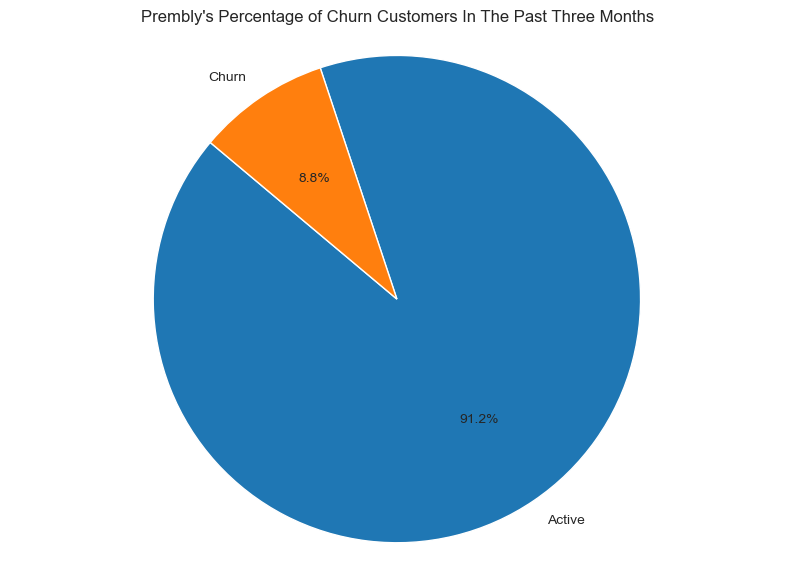

In [362]:
plt.figure(figsize=(10, 7))
plt.pie(prembly_3.Churn.value_counts(), labels=["Active", "Churn"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Prembly's Percentage of Churn Customers In The Past Three Months")
plt.show();

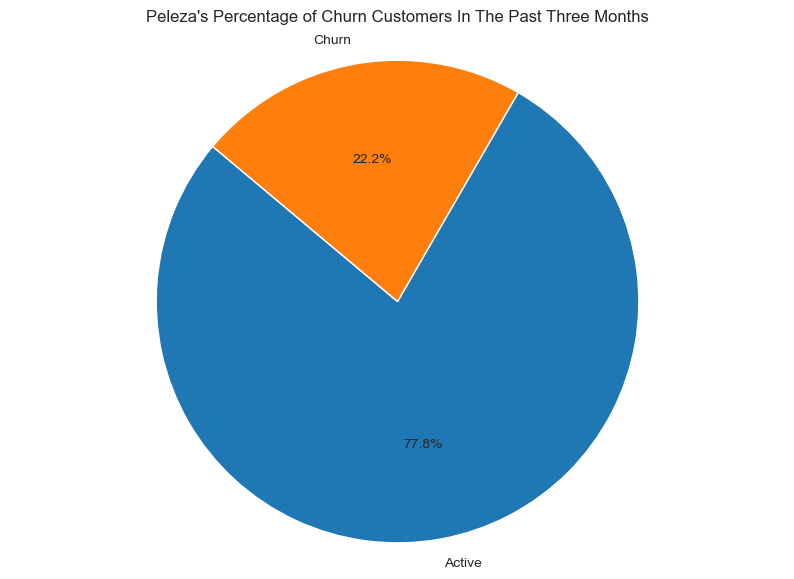

In [363]:
plt.figure(figsize=(10, 7))
plt.pie(peleza_3.Churn.value_counts(), labels=["Active", "Churn"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Peleza's Percentage of Churn Customers In The Past Three Months")
plt.show();

The distribution revealed that out of a total of 507 clients, 45 customers have churned. Among these churned customers, 43 belonged to the Prembly platform, while the remaining 2 were from the Peleza platform. This translates to a churn rate of approximately 8.80% for Prembly and 22.20% for Peleza, indicating an increased churn rate across the Peleza platform and a decreased churn rate accross the Prembly platform in the last three months when compared to nine months period.

Please see here for file attached to access the three months chunred customers:

https://prembly-my.sharepoint.com/:x:/p/adnan/EQXHpmVsWLtAgMYcbxDB6J8B_Y2sZwkrMe5mC5q0gAR4Vw?e=bJiohS

In [364]:
churners_3 = potential_churns_3_months[potential_churns_3_months["Churn"] == "churn"]
peleza_churners_3 = peleza_3[peleza_3["Churn"] == "churn"]
prembly_churners_3 = prembly_3[prembly_3["Churn"] == "churn"]

### When Did They Sign Up?

Prembly: 
2023-04-01    15
2023-06-01    14
2023-10-01     7
2023-11-01     2
2023-05-01     2
2023-08-01     1
2023-09-01     1
2023-07-01     1
Name: date_created, dtype: int64
Peleza: 
2023-06-01    2
Name: date_created, dtype: int64


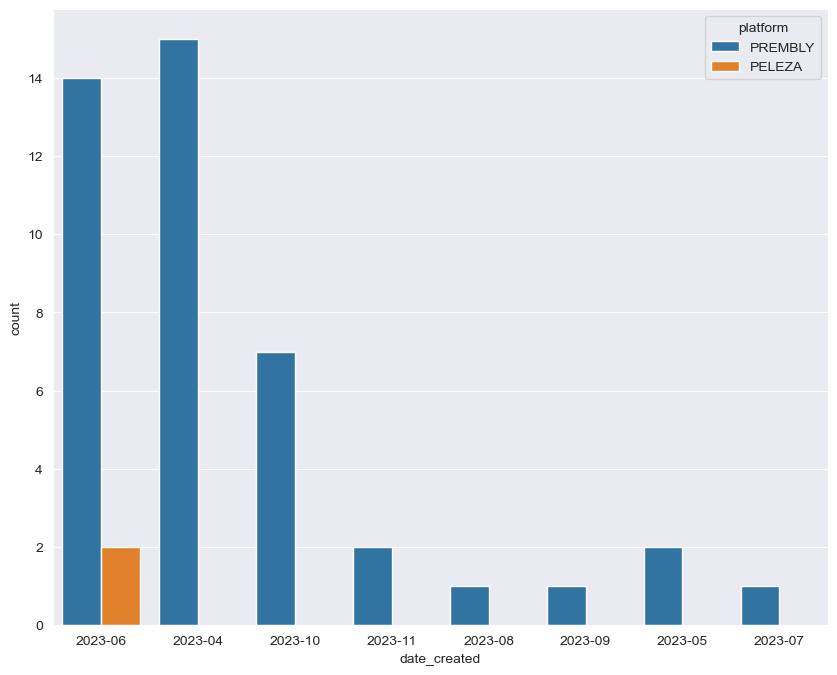

In [371]:
print("Prembly: ")
print(prembly_churners_3.date_created.value_counts())
print("Peleza: ")
print(peleza_churners_3.date_created.value_counts())
churners_3['date_created'] = pd.to_datetime(churners_3['date_created'])
churners_3['date_created'] = churners_3['date_created'].dt.strftime('%Y-%m')
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners_3, x="date_created", hue="platform");

The chart above illustrates that the majority of customers who churned in the past three months also signed up primarily in June and April, with October being the next most common sign-up month.

The chart above illustrates that out of the total 45 churned customers, the majority were associated with the Premlby platform. Specifically, in April, June and October 2023, a significant proportion of churned customers totaling (36) were observed to have signed up, indicating a concentration of churn accross these months. For the Peleza platform, churned customers were fewer, with only two observed signup in June 2023.

#### Recommendation:

We might want to consider offering targeted incentives or promotions to encourage engagement and loyalty among customers who signed up during these months.

### Which Country Did They Sign Up from?

Prembly: 
NG    37
KE     3
GB     1
ZA     1
GH     1
Name: country, dtype: int64
Peleza: 
KE    2
Name: country, dtype: int64


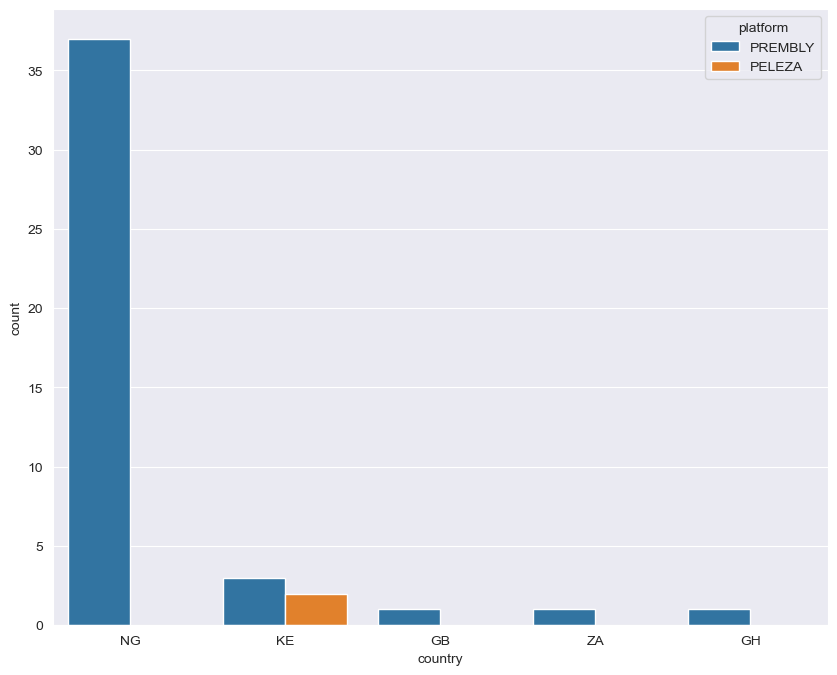

In [372]:
print("Prembly: ")
print(prembly_churners_3.country.value_counts())
print("Peleza: ")
print(peleza_churners_3.country.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners_3, x="country", hue="platform");

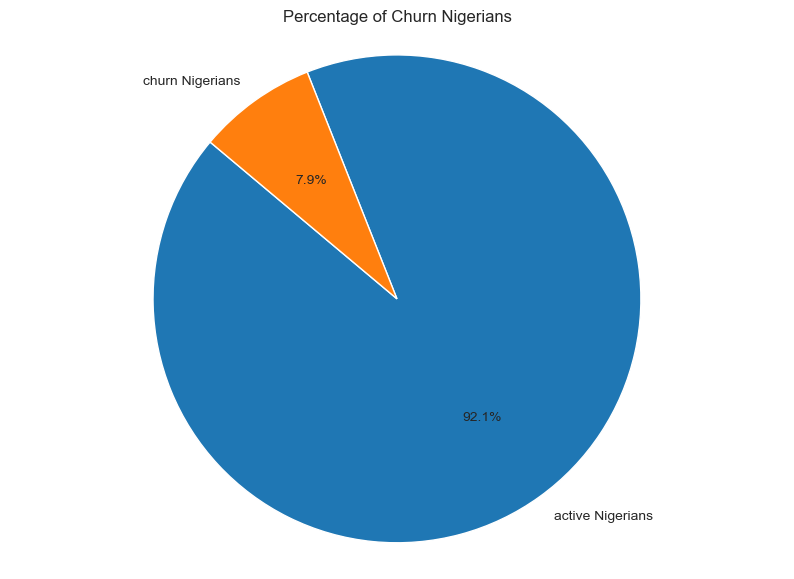

In [244]:
plt.figure(figsize=(10, 7))
ch_3 = potential_churns_3_months[["country", "Churn"]]
def ch_check(data):
    if data["country"] == "NG" and data["Churn"] == "churn":
        return "churn nigerians"
    elif data["country"] == "NG" and data["Churn"] == "active":
        return "active nigerians"
    else:
        pass
    
ch_3["percentage"] = ch_3.apply(ch_check, axis=1)

plt.pie(ch_3.percentage.value_counts(), labels=["active Nigerians", "churn Nigerians"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Churn Nigerians')
plt.show();

The analysis churned customers across based on country reveals distinct patterns. For the Prembly platform, the majority of churned customers, a total 37, signed up from Nigeria (NG), indicating a high presence of churned customers, though, there were smaller numbers of signups from other countries, each contributing to the churned customer base with one or two signups. In contrast, churned customers on the Peleza platform were primarily from Kenya (KE), with two signups observed. 
However, it's important to note that this figure accounts for only 7.9% of the total Nigerian population, as indicated in the pie chart above.

#### Recommendation:

We should try to tailor marketing and customer support efforts to address specific needs or challenges faced by customers in these geographical regions.

### How Did They Sign Up?

Prembly: 
no-referral    34
Name: lead_source, dtype: int64
Peleza: 
Referral         1
Friend/Family    1
Name: lead_source, dtype: int64


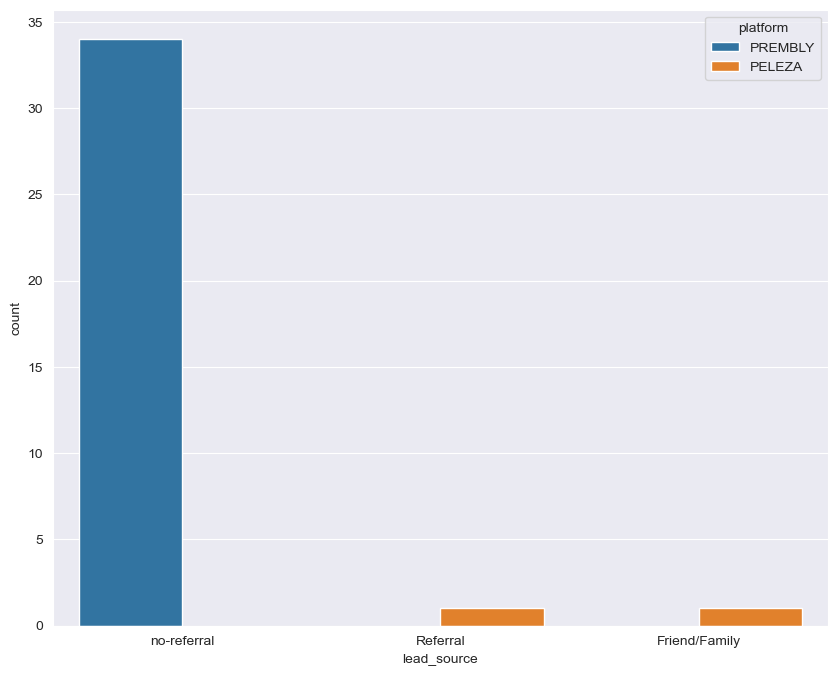

In [373]:
print("Prembly: ")
print(prembly_churners_3.lead_source.value_counts())
print("Peleza: ")
print(peleza_churners_3.lead_source.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners_3, x="lead_source", hue="platform");

The analysis of the lead source shows that nine (9) of the churned customers were not accounted for in this feature. However, the chart above still demonstrates that nearly all churned customers do not have a referral and also all belong to the Prembly platform while only two referred customers are from the Peleza platform.

#### Recommendation
We should try to enhance the referral program on the Prembly platform to increase customer engagement and retention. Encourage existing customers to refer new users by offering incentives or rewards for successful referrals.

### Are they from Verified Sector?

prembly: 
no sector identified                               31
others                                              7
Financial Institution                               3
Professional Services (e.g., legal, consulting)     1
IT                                                  1
Name: verified_sector, dtype: int64
peleza: 
Financial Institution    2
Name: verified_sector, dtype: int64


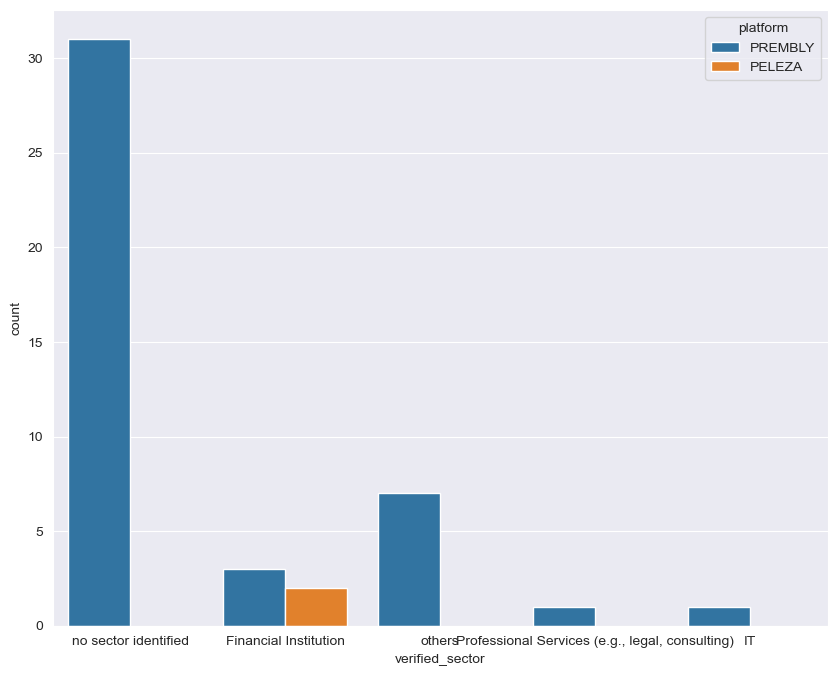

In [375]:
churners_3["verified_sector"] = churners_3["verified_sector"].map(lambda x: "others" if x == "E-commerce" or x == "Agriculture" or x == "Telecommunications" or x == "Retail Sector" or x == "Gaming and Esports" or x == "SaaS Development" or x == "None" or x == "Identity Verification and Security" or x == "Data Integration" else x)
prembly_churners_3["verified_sector"] = prembly_churners_3["verified_sector"].map(lambda x: "others" if x == "E-commerce" or x == "Agriculture" or x == "Telecommunications" or x == "Retail Sector" or x == "Gaming and Esports" or x == "SaaS Development" or x == "None" or x == "Identity Verification and Security" or x == "Data Integration" else x)
peleza_churners_3["verified_sector"] = peleza_churners_3["verified_sector"].map(lambda x: "others" if x == "E-commerce" or x == "Agriculture" or x == "Telecommunications" or x == "Retail Sector" or x == "Gaming and Esports" or x == "SaaS Development" or x == "None" or x == "Identity Verification and Security" or x == "Data Integration" else x)
print("prembly: ")
print(prembly_churners_3.verified_sector.value_counts())
print("peleza: ")
print(peleza_churners_3.verified_sector.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners_3, x="verified_sector", hue="platform");

The analysis of sector identification among churned customers reveals that for Prembly, a significant number of churned customers, accounting for thirty one (31) individuals, were not affiliated with any identified sector. Additionally, smaller numbers of churned customers were observed across other various sectors such as Financial Institutions, and IT. While On the Peleza platform, only two churned customers were associated with the Financial Institution sector.

#### Recommendation:

Improvement in sector identification processes to ensure accurate categorization of customers. Personalize marketing messages and tailor product offerings to better meet the needs of customers in different sectors.

### Availability of Business Document (Document Upload)?

prembly: 
uploaded    42
None         1
Name: business_document, dtype: int64
peleza: 
uploaded    2
Name: business_document, dtype: int64


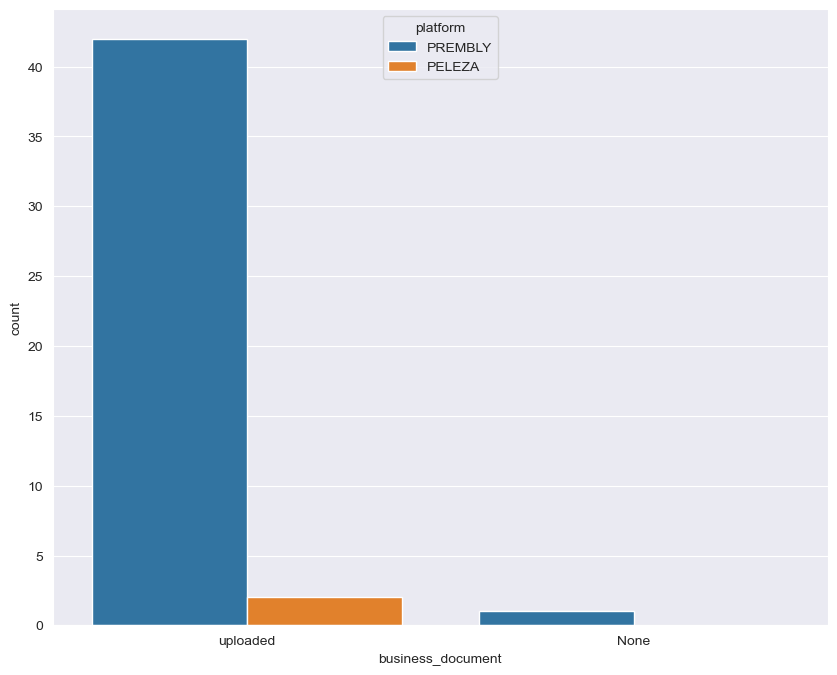

In [376]:
print("prembly: ")
print(prembly_churners_3.business_document.value_counts())
print("peleza: ")
print(peleza_churners_3.business_document.value_counts())
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners_3, x="business_document", hue="platform");

### Server Error?

prembly: 
No     38
Yes     5
Name: server_issue, dtype: int64
peleza: 
No    2
Name: server_issue, dtype: int64


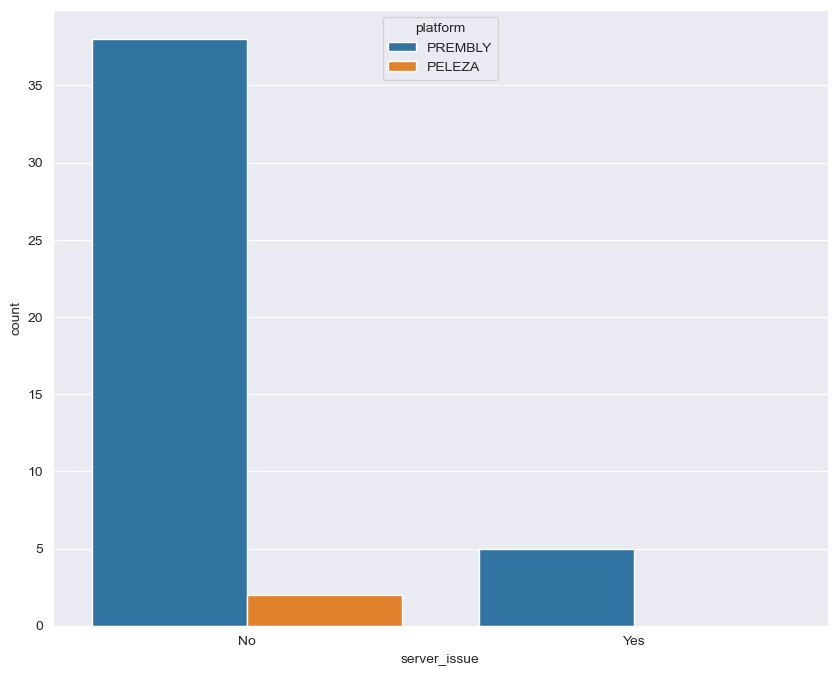

In [378]:
churners_3["server_issue"] = churners_3.apply(check_server_error, axis=1)
prembly_churners_3["server_issue"] = prembly_churners_3.apply(check_server_error, axis=1)
peleza_churners_3["server_issue"] = peleza_churners_3.apply(check_server_error, axis=1)

print("prembly: ")
print(prembly_churners_3.server_issue.value_counts())
print("peleza: ")
print(peleza_churners_3.server_issue.value_counts())

sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=churners_3, x="server_issue", hue="platform");

The chart above shows that a number of churned customers (5) made API calls, which totals of (17) with Zero (0) success over the last 3 months. To furhter look into this case, the chart and data below shows these customers and their details.

#### Recommendation:

We must investigate the root causes of API errors by churned customers and implement measures to address these issues promptly and improve the reliability and performance of API services to enhance overall customer satisfaction.

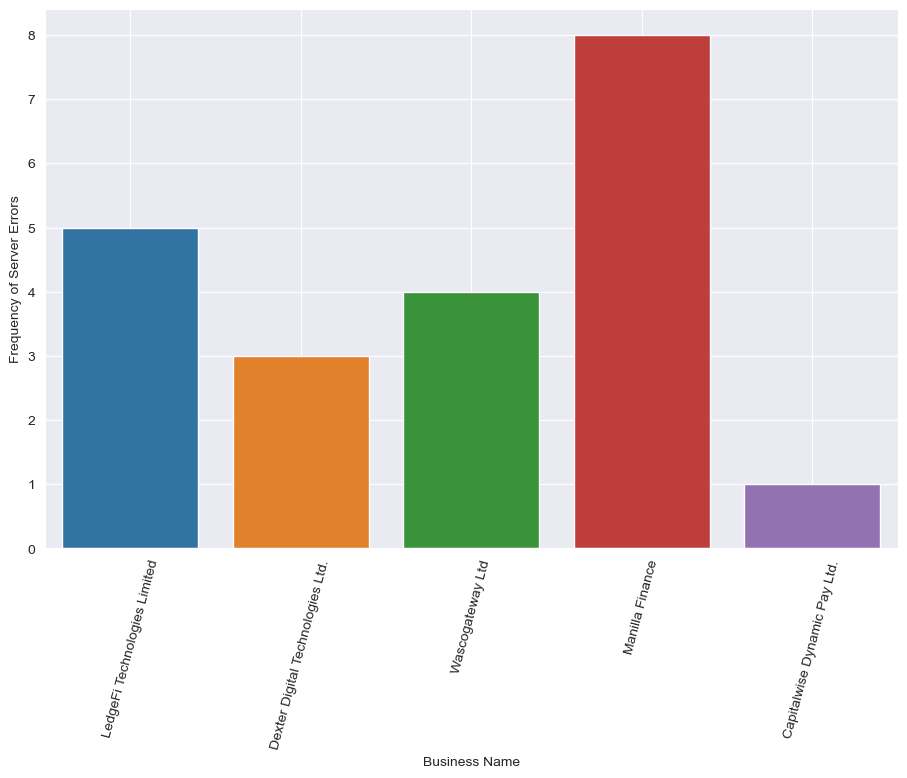

In [821]:
endpoints_3 = churners_3[churners_3["server_issue"] == "Yes"]
plt.figure(figsize=(11,7))
sns.barplot(x="business_name", y="server_error", data=endpoints_3)
plt.xticks(rotation=75)
plt.xlabel('Business Name')
plt.ylabel('Frequency of Server Errors')
plt.grid(True);

The chart demonstrates churn customers that made transaction in their wallet in the last 3 months with five (5) of of them included in this category

In [382]:
check_endpoint_called_3 = pd.merge(endpoints_3, end_point, on=["org_id", "business_name"], how="inner")
check_endpoint_called_3 = check_endpoint_called_3[["org_id", "business_name", "date_captured", "endpoint_called"]]
check_endpoint_called_3 = check_endpoint_called_3.drop_duplicates()
check_merged_3 = pd.merge(check_endpoint_called_3, potential_churns_3_months, on=["org_id", "business_name"], how="inner")
check_merged_3 = check_merged_3.drop_duplicates()

Please see here for the file attached: https://prembly-my.sharepoint.com/:x:/p/adnan/EXFsNu1h2-pLpkVzp0OucycBNVURcZQxErnrYDwByv-Mkg?e=dKbipY

In [392]:
# file_path = "server_error_3.csv"
# check_merged_3[["business_name", "endpoint_called", "date_captured", "total_calls", "success", "server_error", "verified_sector", "business_document", "platform", "email", "date_created"]].to_csv(file_path, index=False)

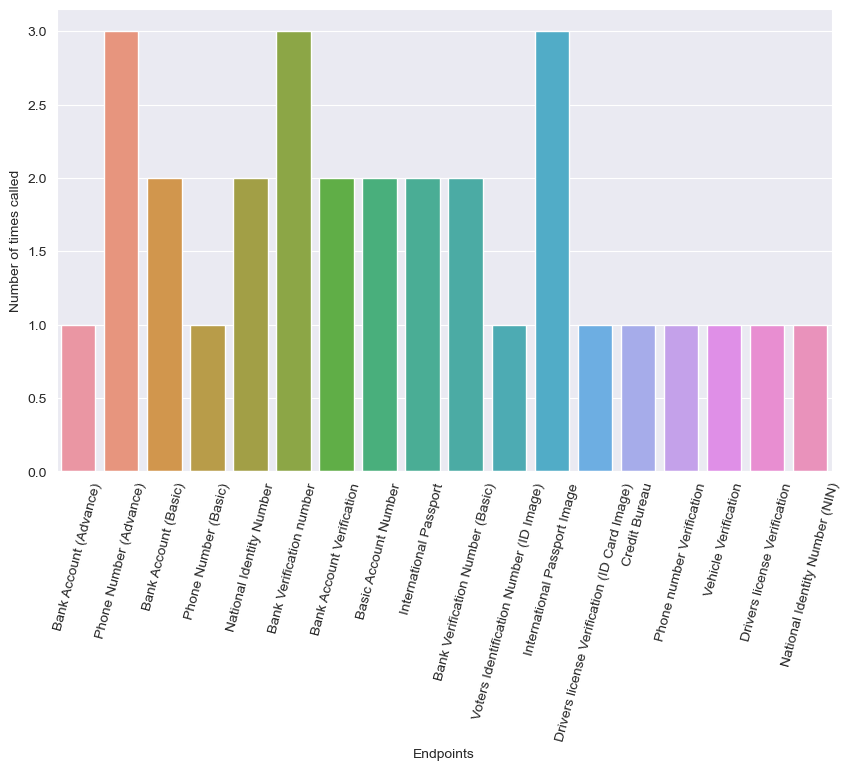

In [820]:
plt.figure(figsize=(10, 6))
sns.countplot(data=check_endpoint_called_3, x="endpoint_called")
plt.xlabel('Endpoints')
plt.ylabel('Number of times called')
plt.xticks(rotation=75)
plt.show();

The chart above shows the ooccurence of the endpoints with most API calls with no success. indicating that the Phone Number Advance, NIN and Voters identification are mostly the endpoints called with no success by the churned customers

### Any Transaction by Churn on Wallet?

In [385]:
wallet_funding = pd.read_csv("datasets/wallet_funding.csv", names = ['org_id', 'business_name', 'amount', 'channel', 'currency', 'trans_desc', 'previous', 'reference', 'trans_state', 'trans_type', 'date_of_transaction'])
wallet_funding = wallet_funding[~wallet_funding['business_name'].str.contains("Prembly")]
wallet_df_3 = wallet_funding.copy()
wallet_df_3["trans_frequency"] = wallet_df_3["amount"]
wallet_df_3 = wallet_df_3.groupby(["org_id", "business_name"], as_index=False).agg({"amount": pd.Series.sum, "trans_frequency": pd.Series.count})

(14, 23)


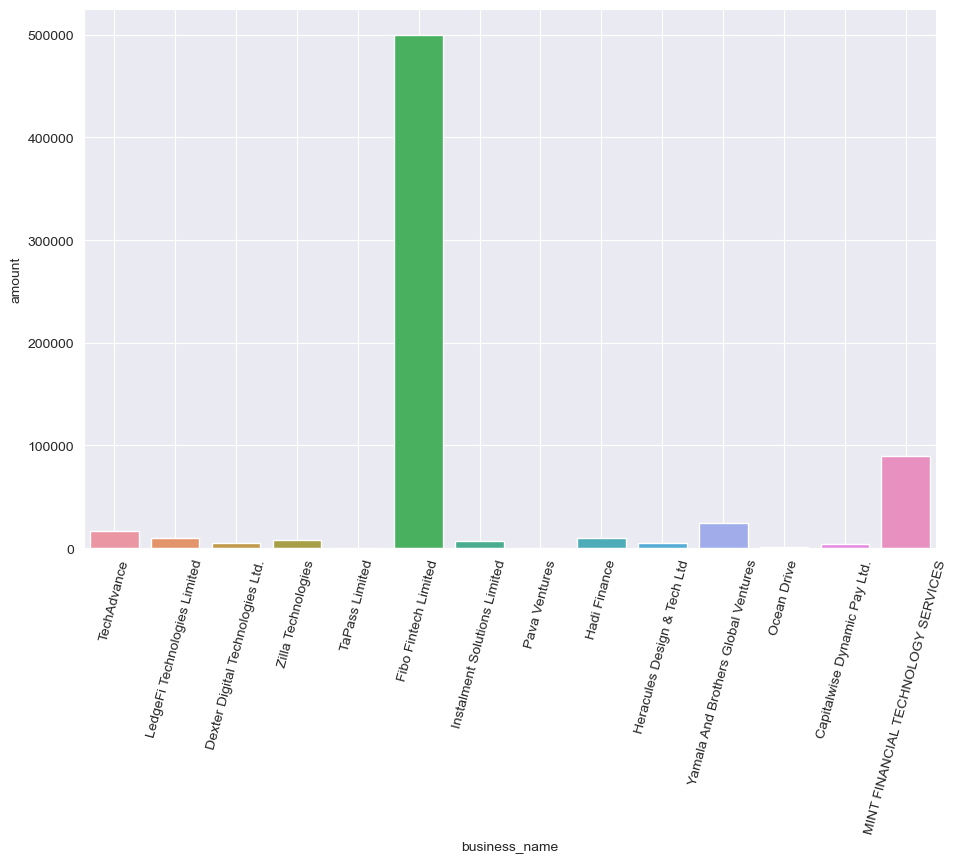

In [396]:
wallet_check_3 = pd.merge(wallet_df_3, churners_3, on=["org_id", "business_name"], how="inner")
print(wallet_check_3.shape)
plt.figure(figsize=(11,7))
sns.barplot(x="business_name", y="amount", data=wallet_check_3)
plt.xticks(rotation=75)
plt.grid(True);

Analysing wallet top ups, Only few churn customers, a total of thirteen (13) out of fourty-five (45) has made transaction in their wallet in the last 3 months.

#### Recommendation:

We should develop targeted marketing campaigns or product features to incentivize continued usage and foster customer loyalty since it was observed that some customers actually made top ups without having a successfull API call.

### Customers that has been using our services but discontinued Since November

A total of 18 customers stopped using our services since october

In [517]:
merged_dff_ = pd.merge(churners_3, churners, on=["org_id", "business_name"], how='left', indicator=True)
not_in_9_months_df = merged_dff_[merged_dff_['_merge'] == 'left_only']
not_in_9_months_df = not_in_9_months_df.drop(["total_calls_y", "num_of_calls_y", "verified_sector_y", "extra_x", "_merge", "Churn_x", "platform_y", "date_created_y", "lead_source_y", "verification_status_y", "business_document_y", "email_y", "phone_y", "server_issue_y", "success_y", "server_error_y", "no_record_y", "currency_y", "Churn_y", "extra_y", "country_y", "revenue_y"], axis=1)
print(not_in_9_months_df.shape)

(19, 19)


In [531]:
_start_date = '2023-04'
_end_date = '2024-02'

_start_date = datetime.strptime(_start_date, '%Y-%m')
_end_date = datetime.strptime(_end_date, '%Y-%m')

not_in_9_months_df["date_created_x"] = pd.to_datetime(not_in_9_months_df["date_created_x"])
not_in_9_months_dff = not_in_9_months_df[not_in_9_months_df["date_created_x"] <= _end_date]
not_in_9_months_dff.shape

(19, 19)

In [532]:
api_report = pd.read_csv("datasets/api_report.csv", names=['id','org_id','business_name', 'success', 'no_record', 'server_error','revenue','date_captured','currency','country'])
end_point = pd.read_csv("datasets/endpoint_data.csv", names=['id', 'org_id', 'business_name', 'endpoint_called', 'total_calls', 'date_captured'])
wallet_funding = pd.read_csv("datasets/wallet_funding.csv", names = ['org_id', 'business_name', 'amount', 'channel', 'currency', 'trans_desc', 'previous', 'reference', 'trans_state', 'trans_type', 'date_of_transaction'])
wallet_6 = wallet_funding.copy()

month_6_api = api_report.copy()
month_6_endpoint = end_point.copy()

month_6_api["date_captured"] = pd.to_datetime(month_6_api["date_captured"])
month_6_endpoint["date_captured"] = pd.to_datetime(month_6_endpoint["date_captured"])
wallet_6["date_of_transaction"] = pd.to_datetime(wallet_6["date_of_transaction"])

month_6_api = month_6_api[month_6_api["date_captured"] <= _end_date]
month_6_endpoint = month_6_endpoint[month_6_endpoint["date_captured"] <= _end_date]
# wallet_6 = wallet_6[wallet_6["date_of_transaction"] <= _end_date]

not_in_9_months_dff = not_in_9_months_df[not_in_9_months_df["date_created_x"] < _end_date]
not_in_9_months_dfff = not_in_9_months_dff[["org_id", "business_name", "date_created_x", "server_error_x"]]

In [533]:
merg = pd.merge(not_in_9_months_dfff, month_6_api, on=["org_id", "business_name"], how="inner")
mergee = pd.merge(merg, month_6_endpoint, on=["org_id", "business_name"], how="inner")
mergee = mergee.drop_duplicates()

### Total Calls, Success Calls, Server Error?

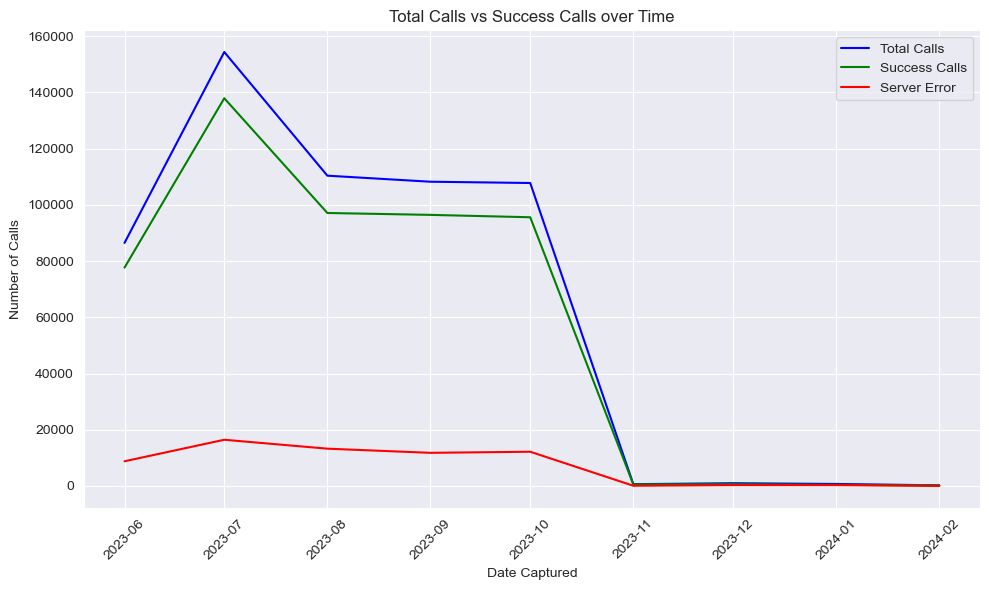

In [636]:
merged_stat = mergee.groupby(["date_captured_y"], as_index=False).agg({"total_calls": pd.Series.sum, "success": pd.Series.sum, "revenue": pd.Series.sum, "server_error": pd.Series.sum, "endpoint_called": pd.Series.count})
merged_stat["total_call"] = merged_stat["success"]  + merged_stat["server_error"]
plt.figure(figsize=(10, 6))
plt.plot(merged_stat.date_captured_y, merged_stat['total_call'], label='Total Calls', color='blue')
plt.plot(merged_stat.date_captured_y, merged_stat['success'], label='Success Calls', color='green')
plt.plot(merged_stat.date_captured_y, merged_stat['server_error'], label='Server Error', color='red')
plt.xlabel('Date Captured')
plt.ylabel('Number of Calls')
plt.title('Total Calls vs Success Calls over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This shows total calls, success calls, and server error over the period they frequently used our services

### When Exactly did they discontinued?

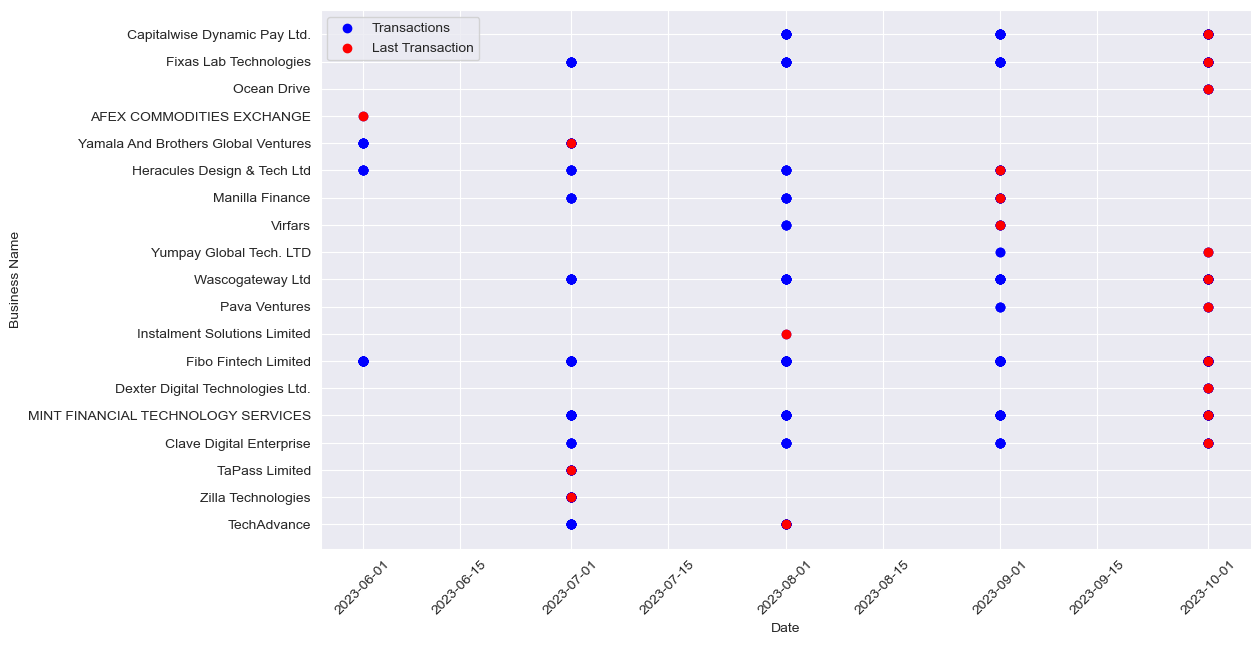

In [552]:
last_transactions = mergee_success.groupby('business_name')['date_captured_x'].max()
plt.figure(figsize=(12, 7))
plt.scatter(mergee_success['date_captured_x'], mergee_success['business_name'], color='blue', label='Transactions')
plt.scatter(last_transactions.values, last_transactions.index, color='red', label='Last Transaction')
plt.xlabel('Date')
plt.ylabel('Business Name')
plt.xticks(rotation=45)
plt.legend()
plt.show();

The plot above shows when the businesses stopped using our services. The red dot signifies the date they stoped

### Endpoints Called

Text(0.5, 1.0, 'Endpoints Frequently Called')

<Figure size 1500x700 with 0 Axes>

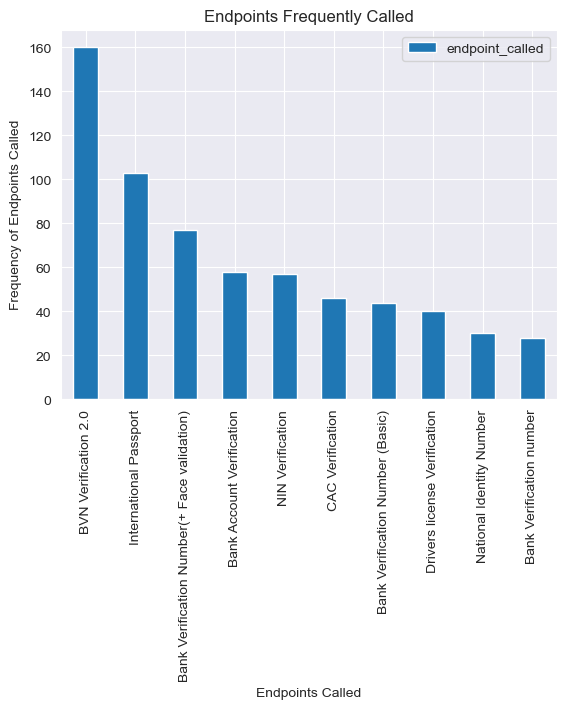

In [827]:
mergeeee = mergee.endpoint_called.value_counts().reset_index()

plt.figure(figsize=(15, 7))
mergeeee.head(10).plot(x="index", y="endpoint_called", kind="bar")
plt.xlabel("Endpoints Called")
plt.ylabel("Frequency of Endpoints Called")
plt.xticks(rotation=90);
plt.title("Endpoints Frequently Called")

The figure above shows the endpoints mostly called by the customers that discontinued using our services since November.

In [811]:
end_point = pd.read_csv("datasets/endpoint_data.csv", names=['id', 'org_id', 'business_name', 'endpoint_called', 'total_calls', 'date_captured'])
api_report = pd.read_csv("datasets/api_report.csv", names=['id','org_id','business_name', 'success', 'no_record', 'server_error','revenue','date_captured','currency','country'])
end_point = end_point[~end_point['business_name'].str.contains("Prembly")]
api_report = api_report[~api_report['business_name'].str.contains("Prembly")]

endpoint_analysis = pd.merge(end_point, api_report, on=["org_id", "business_name"], how="outer")
endpoint_analysis = endpoint_analysis.fillna(0)
endpoint_analysis["total_call"] = endpoint_analysis["success"] + endpoint_analysis["server_error"]
endpoint_analysis = endpoint_analysis[(endpoint_analysis["endpoint_called"] == "BVN Verification 2.0") | (endpoint_analysis["endpoint_called"] == "International Passport") | (endpoint_analysis["endpoint_called"] == "Bank Account Verification") | (endpoint_analysis["endpoint_called"] == "NIN Verification") | (endpoint_analysis["endpoint_called"] == "Bank Verification Number(+ Face validation)")]
endpoint_analysis["date_captured_x"] = pd.to_datetime(endpoint_analysis["date_captured_x"])
endpoint_analysis['date_captured_x'] = endpoint_analysis['date_captured_x'].dt.strftime('%Y-%m')
merged_data = endpoint_analysis.copy()
merged_data["churned"] = merged_data.apply(detect_churner, axis=1)

In [812]:
churned_customers = merged_data[merged_data['churned'] == "churn"]
not_churned_customers = merged_data[merged_data["churned"] == "active"]
top_5_endpoints = mergee.endpoint_called.value_counts().head(5).index.tolist()

<Figure size 1200x800 with 0 Axes>

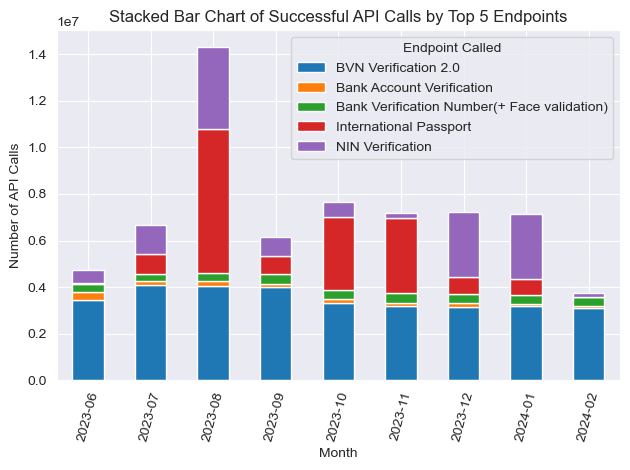

In [826]:
pivot_table = not_churned_customers.pivot_table(index=pd.Grouper(key='date_captured_x'), columns='endpoint_called', values='success', aggfunc='sum', fill_value=0)
pivot_tablee = churned_customers.pivot_table(index=pd.Grouper(key='date_captured_x'), columns='endpoint_called', values='total_call', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Successful API Calls by Top 5 Endpoints')
plt.xlabel('Month')
plt.ylabel('Number of API Calls')
plt.xticks(rotation=75)
plt.legend(title='Endpoint Called')
plt.grid(True)
plt.tight_layout()
plt.show();

In [830]:
# plt.figure(figsize=(15, 10))
# for endpoint in top_5_endpoints:
#     plt.plot(pivot_tablee.index, pivot_tablee[endpoint], marker='o', label=endpoint)
# plt.title('Line Chart of Unsuccessful API Calls by Top 5 Endpoints')
# plt.xlabel('Month')
# plt.ylabel('Number of Unsuccessful API Calls')
# plt.xticks(rotation=75)
# plt.legend(title='Endpoint Called')
# plt.grid(True)
# plt.tight_layout()
# plt.show();

The above charts showed the activity on the endpoints over the period of nine (9) months based on the successfull call on each API 

## Summary (Three Months Churn)

1. **Total and Success Calls Distribution:**
   - The minimum total and success calls made by any customer are 0, indicating the lowest success call made.
   - At the 25th percentile, 25% of customers made 6 or fewer total and success calls.
   - The median total and success call count is 29 and 43, respectively, suggesting that half of the customers made below 29 total calls and 43 successful calls.
   - At the 75th percentile, 75% of customers made 153 total calls with successful calls of 278 or fewer.
   - Notably, 45 customers, representing 9% of the total customers, have discontinued or stopped using the product or service over the last three months, while 453 customers remain active and retained.

2. **Churn Trends:**
   - The majority of customers who churned in the past three months primarily signed up in June and April, with October being the next most common sign-up month.
   - Additionally, the analysis reveals that the majority of churned customers are from Nigeria, though this figure accounts for only 8% of the total Nigerian population.
   - Notably, a significant number of churned customers were not referred, with the "no_referral" label accounting for the majority of cases.

3. **API Calls and Transactions:**
   - Among churned customers, a considerable number made API calls, with a total of 17 calls with zero success over the last three months.
   - The analysis also identifies churned customers who made transactions in their wallet, with thirteen customers falling into this category.
   - Additionally, the most-called endpoints with no success by churned customers include the phone number advance, NIN, and Voters identification.

# Conclusion

#### Observations
1. A significant number of customers cannot be accounted for in the dataset being analysed. That is, there are customers present in the cusomter table but not in other table. Therefore, it cannot be concluded as churn because they do not have any record

2. Some customer's successful api calls are greater than total API calls

3. The sum of success calls and server errors does not give total API calls

#### Summary and Conclusion
The churn analysis highlights the importance of proactive measures in understanding and addressing the factors contributing to customer churn. To effectively avoid churn and enhance customer retention, it is recommended that the Prembly platform focuses on improving sector identification methods and implementing targeted referral programs to incentivize customer loyalty. Additionally, both platforms can benefit from ongoing monitoring and optimization of API services to ensure a seamless user experience and minimize error encounters. By prioritizing these areas of improvement, the platforms can enhance overall customer satisfaction, strengthen retention rates, and ultimately drive long-term business success.